In [1]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False



import sys,os,pdb,copy,pickle
from importlib import reload
# import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
sys.path.append('/mnt/home/szheng/projects/place_variability/code')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp


import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

67 sessions!
67 sessions!


In [2]:
import database
db = database.db

subdb = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)
subdb = subdb.query('ntrials>=20&n_neurons>=50')
to_exclude_sess = ['e16_3m2_211211']
subdb=subdb.loc[~subdb['sess_name'].isin(to_exclude_sess)]


import pf_recombine_central as pfrc
import fr_map_one_session as fmos
import switch_detection_one_session as sdos
import get_all_switch_add_metrics as gasam

import preprocess_one_session as prepos

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
db_sorted = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)
ii=2
data_dir_full = db_sorted['data_dir_full'][ii]
ani = db_sorted.index[ii][0]#'e15_13f1'#'e13_26m1'
sess=db_sorted['sess_name'][ii]#'e15_13f1_220117'#'e13_26m1_210913'
print(sess)

e15_13f1_220118


In [32]:
reload(prep)

<module 'preprocess' from '/mnt/home/szheng/projects/seq_detection2/code/preprocess.py'>

In [9]:
# load data
mat_to_return=prep.load_stuff(data_dir_full)
# sessionPulses=mat_to_return['sessionPulses']
# filtered = mat_to_return['filtered']
behavior=mat_to_return['behavior']
ripples = mat_to_return['ripples']
sleep_state_episodes = mat_to_return['SleepStateEpisodes']
cell_metrics=mat_to_return['cell_metrics']
mergepoints = mat_to_return['mergepoints']
cell_type_mask = mat_to_return['cell_type_mask']
res_all_epochs_d, ripple_time_ints_epochs_d = prep.get_spike_count_rate_participation_in_ripple_all(cell_metrics,
                                                                                                    ripples,
                                                                                                    mergepoints,
                                                                                                   )



prep_res = dpp.load_spk_beh_df(data_dir_full,force_reload=False,extra_load={})
spk_beh_df=prep_res['spk_beh_df']
_,spk_beh_df=dpp.group_into_trialtype(spk_beh_df)
cell_cols_d = prep_res['cell_cols_d']
# beh_df = prep_res['beh_df']
# beh_df_d,beh_df=dpp.group_into_trialtype(beh_df)
spike_trains = prep_res['spike_trains']

In [6]:
ripple_peak_times=ripples.peaks

In [7]:
import pynapple as nap

In [12]:
nrem = nap.IntervalSet(start=sleep_state_episodes['ints']['NREMepisode'][:,0],end=sleep_state_episodes['ints']['NREMepisode'][:,1])



# spk_train_nrem = spike_trains.restrict(nrem)

# spk_count_nrem_pyr = spk_count_nrem[cell_cols_d['pyr']]

reload(dpp)
nrem_episode_intervals = sleep_state_episodes['ints']['NREMepisode']
ripple_peak_times = ripples.peaks
spk_count_nrem = dpp.get_nrem_firing_with_ripple_time(spike_trains, nrem_episode_intervals, ripple_peak_times, bin_size=0.1)



spk_count_nrem_pyr = spk_count_nrem[cell_cols_d['pyr']]

In [196]:
st,ed=3200,3300
intvl=nap.IntervalSet(start=st,end=ed)

spk_count_nrem_sub = spk_count_nrem.restrict(intvl)

spk_count_nrem_sub_pyr = spk_count_nrem_sub[cell_cols_d['pyr']]
rip_peak_sub = spk_count_nrem_sub['ripple_peak']



In [125]:
import matplotlib.gridspec as gridspec

<Axes: xlabel='Time (s)'>

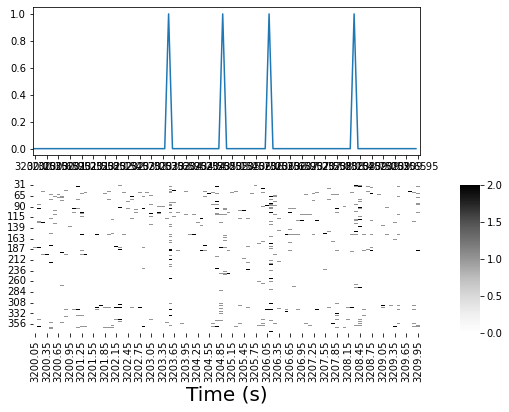

In [197]:
gs=gridspec.GridSpec(2,2,width_ratios=[1,0.05])
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(gs[0,0])
# ax.scatter(rip_peak_sub.index,np.ones(len(rip_peak_sub)))
ax.plot(rip_peak_sub.values)
ax=fig.add_subplot(gs[1,0],sharex=ax)
cax=fig.add_subplot(gs[1,1])


# Determine the y-extent based on the number of columns in the DataFrame
toplot=spk_count_nrem_sub_pyr.as_dataframe().T
ymin, ymax = 0, len(toplot.index)
xmin,xmax=toplot.columns.min(),toplot.columns.max()
sns.heatmap(toplot,cmap='Greys',vmax=2,ax=ax,cbar_ax=cax)


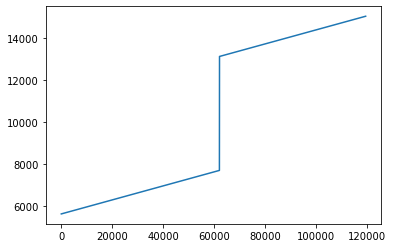

In [288]:
plt.plot(behavior['timestamps'])

In [287]:
mergepoints['timestamps']

array([[    0.        ,  5616.60796667],
       [ 5616.608     ,  7716.63996667],
       [ 7716.64      , 13105.59996667],
       [13105.6       , 15049.02396667],
       [15049.024     , 19118.94396667],
       [19118.944     , 21627.77596667],
       [21627.776     , 27902.77596667],
       [27902.776     , 29653.11196667]])

In [13]:
post_ep = nap.IntervalSet(start=mergepoints['timestamps'][2,0],end=mergepoints['timestamps'][2,1])

spk_count_nrem_pyr_post = spk_count_nrem_pyr.restrict(post_ep)

In [14]:
def get_triu(df):
    mat=df.values
    return mat[np.triu_indices_from(mat,1)]

In [15]:
def get_first_second_half_pairwise_correlation(spk_df,intvl=None):
    '''
    get the correlation for each pair of neuron, for first and second half of an interval
    '''
    if intvl is None:
        intvl = [spk_df.index[0],spk_df.index[-1]]
    
    st=intvl[0]
    end = intvl[-1]
    time_span = end-st
    mid=time_span/2 + st
    half_intervals = np.array([[st,mid],[mid,end]])
    half_intervals = nap.IntervalSet(start=half_intervals[:,0],end=half_intervals[:,-1])
    
    corr_all_int = []
    corr_all_int_flat = []
    for i in np.arange(half_intervals.shape[0]):
        spk_df_half = spk_df.restrict(half_intervals.iloc[[i]])
        corr_half = spk_df_half.as_dataframe().corr()
        corr_all_int.append(corr_half)
        corr_all_int_flat.append(get_triu(corr_half))
    corr_all_int_flat = np.array(corr_all_int_flat)
    
    return corr_all_int, pd.DataFrame(corr_all_int_flat).T,time_span



In [16]:
corr_all_int_nrem, corr_all_int_flat_nrem,time_span_nrem=get_first_second_half_pairwise_correlation(spk_count_nrem_pyr_post)


/tmp/ipykernel_584254/110146323.py:13: UserWarning: Some starts and ends are equal. Removing 1 microsecond!
  half_intervals = nap.IntervalSet(start=half_intervals[:,0],end=half_intervals[:,-1])


In [18]:
behavior_ep = nap.IntervalSet(start=mergepoints.timestamps[1,0],end=mergepoints.timestamps[1,1])
spk_count_beh=spike_trains.restrict(behavior_ep).count(0.1)

spk_count_beh_pyr = spk_count_beh[cell_cols_d['pyr']]

In [19]:

corr_all_int, corr_all_int_flat,time_span = get_first_second_half_pairwise_correlation(spk_count_beh_pyr)

/tmp/ipykernel_584254/110146323.py:13: UserWarning: Some starts and ends are equal. Removing 1 microsecond!
  half_intervals = nap.IntervalSet(start=half_intervals[:,0],end=half_intervals[:,-1])


In [27]:
corr_all_int_flat.corr()

,0,1
0,1.000000,0.689818
1,0.689818,1.000000


[Text(0.5, 0, 'Behavior first half'),
 Text(0, 0.5, 'Behavior second half'),
 Text(0.5, 1.0, 'pairwise corr, time span=35.00 min')]

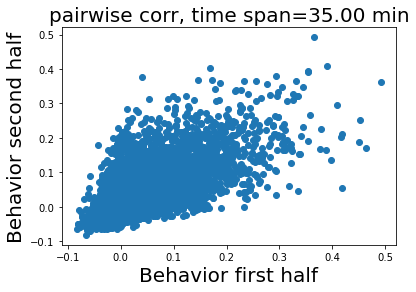

In [28]:
fig,ax=plt.subplots()
ax.scatter(corr_all_int_flat[0],corr_all_int_flat[1])
ax.set(xlabel='Behavior first half',ylabel='Behavior second half',title=f'pairwise corr, time span={time_span/60:.2f} min')

In [30]:
corr_all_int_flat_nrem.corr()

,0,1
0,1.000000,0.785583
1,0.785583,1.000000


[Text(0.5, 0, 'NREM Post first half'),
 Text(0, 0.5, 'NREM Post second half'),
 Text(0.5, 1.0, 'pairwise corr, time span=45.52 min')]

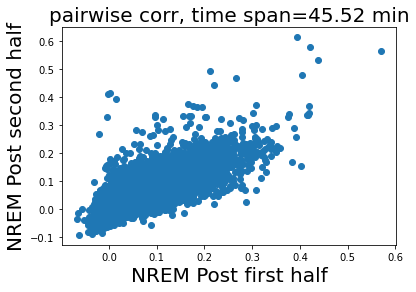

In [29]:
fit,ax=plt.subplots()
ax.scatter(corr_all_int_flat_nrem[0],corr_all_int_flat_nrem[1])
ax.set(xlabel='NREM Post first half',ylabel='NREM Post second half',title=f'pairwise corr, time span={time_span_nrem/60:.2f} min')


,31,32,33,34,35,36,37,38,39,40,...,367,368,369,370,371,372,373,374,375,376
31,1.000000,0.145070,0.157413,0.174525,0.098576,0.147316,0.123729,0.089906,-0.069164,0.084371,...,0.032092,0.050723,0.047867,0.137986,0.060017,0.014999,0.079007,0.165921,0.068424,0.093155
32,0.145070,1.000000,0.065554,0.076342,0.194834,0.061029,0.146624,0.100923,-0.062991,0.051468,...,-0.003002,0.009430,0.010183,0.119130,-0.002814,-0.005121,0.016581,0.037698,0.025239,-0.005674
33,0.157413,0.065554,1.000000,0.228699,0.070465,0.164779,0.136049,0.060224,-0.049300,0.056695,...,0.024177,0.055718,-0.000302,0.102495,0.010054,0.049089,0.053014,0.090358,-0.010980,-0.003821
34,0.174525,0.076342,0.228699,1.000000,0.060949,0.135180,0.100034,0.043737,-0.062375,0.089673,...,0.074971,0.055841,0.061636,0.080659,0.036591,0.036071,0.061375,0.058499,0.102080,0.070476
35,0.098576,0.194834,0.070465,0.060949,1.000000,0.095813,0.056668,0.143109,-0.055467,0.043580,...,0.016773,0.006077,0.011451,0.045070,0.002988,0.003913,0.055070,0.171369,-0.008667,0.023049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,0.014999,-0.005121,0.049089,0.036071,0.003913,0.038694,0.006224,0.005159,-0.031098,0.046197,...,0.077264,-0.002254,0.031694,0.016485,0.036984,1.000000,0.064636,0.036623,0.019259,0.039226
373,0.079007,0.016581,0.053014,0.061375,0.055070,0.049251,0.033335,0.025521,-0.036947,0.034894,...,0.065838,0.040552,0.025592,0.068513,0.009503,0.064636,1.000000,0.098292,0.000707,0.049830
374,0.165921,0.037698,0.090358,0.058499,0.171369,0.074168,0.040427,0.083663,-0.032360,0.018193,...,0.018845,0.097800,0.010507,0.080700,0.029533,0.036623,0.098292,1.000000,0.014078,0.118689
375,0.068424,0.025239,-0.010980,0.102080,-0.008667,0.060560,0.019869,0.006921,-0.023802,0.083338,...,0.059935,0.033983,0.071063,0.078308,0.018171,0.019259,0.000707,0.014078,1.000000,0.139067


In [261]:
spk_count_beh

,1,2,3,4,5,6,7,8,9,10,...,367,368,369,370,371,372,373,374,375,376
Time (s),,,,,,,,,,,,,,,,,,,,,
6572.466,2,1,3,3,2,3,11,1,4,1,...,0,0,0,0,0,0,0,0,0,0
6572.566,3,4,5,2,3,2,10,1,10,1,...,0,0,0,0,0,0,0,0,0,0
6572.666,4,1,4,4,0,11,11,1,11,3,...,0,0,0,0,0,0,0,0,0,0
6572.766,2,2,3,1,6,1,8,1,11,3,...,0,0,0,0,1,0,0,0,0,0
6572.866,1,0,4,0,4,2,6,1,2,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8442.966,5,0,3,2,3,5,9,0,4,2,...,0,0,0,0,0,0,1,0,0,0
8443.066,3,1,2,3,0,6,8,1,0,1,...,0,1,0,0,0,0,0,0,0,0
8443.166,3,2,2,2,3,4,5,1,0,1,...,0,0,0,0,0,0,0,0,0,2


In [222]:
row

start    11599.50
end      13292.95
Name: 1, dtype: float64

In [219]:
half_intervals

,start,end
0,9906.05,11599.499999
1,11599.50,13292.950000


In [213]:
time_span

3386.900000003001

In [209]:
ntimes = spk_count_nrem_pyr_post

,31,32,33,34,35,36,37,38,39,40,...,367,368,369,370,371,372,373,374,375,376
Time (s),,,,,,,,,,,,,,,,,,,,,
9906.05,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9906.15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9906.25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9906.35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9906.45,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13292.55,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13292.65,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13292.75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [269]:
pd.DataFrame(corr_all_int_flat)

,0,1,2,3,4,5,6,7,8,9,...,55268,55269,55270,55271,55272,55273,55274,55275,55276,55277
0,-0.009013,-0.012951,0.024021,-0.042576,0.025757,0.018267,-0.018430,-0.012138,-0.023355,0.038405,...,0.014106,-0.001593,-0.002885,-0.000116,0.068753,-0.010239,-0.010588,-0.009487,-0.001153,0.001630
1,-0.020038,-0.016037,0.026218,0.037893,0.031168,-0.005278,0.018847,-0.013015,-0.038500,0.014874,...,-0.004405,0.022478,-0.003462,-0.001059,0.044290,-0.008500,0.028536,-0.007138,0.001345,0.040568


In [267]:
scipy.stats.pearsonr(corr_all_int_flat[0],corr_all_int_flat[1])

ValueError: array must not contain infs or NaNs

In [205]:
post_ep

,start,end
0,8443.456,14062.655967


In [16]:
spike_trains.getby_category('ispyr')

{False:   Index    rate  celltype              ispyr    isint
 -------  ------  ------------------  -------  -------
       1   19.78  Narrow Interneuron        0        1
       2   17.69  Narrow Interneuron        0        1
       3   17.99  Narrow Interneuron        0        1
       4   20.36  Narrow Interneuron        0        1
       5   19.06  Narrow Interneuron        0        1
       6   21.01  Narrow Interneuron        0        1
       7   21.29  Narrow Interneuron        0        1
       8   16.28  Narrow Interneuron        0        1
       9   16.42  Narrow Interneuron        0        1
      10   15.26  Narrow Interneuron        0        1
      11   16.04  Narrow Interneuron        0        1
      12   14.28  Narrow Interneuron        0        1
      13   15.79  Narrow Interneuron        0        1
      14   17.91  Narrow Interneuron        0        1
      15   19.26  Narrow Interneuron        0        1
      16   14.72  Narrow Interneuron        0        1
   